# Kleiner Test

In [1]:
from n2 import ConnectGene, NodeGene, NodeTypes, Individuum
import numpy as np
import gymnasium as gym

In [2]:
def simplest_ind(n_inputs, n_outputs, bias=False):
    node_genes = []
    connect_genes = []
    for i in range(n_inputs):
        node_genes.append(NodeGene(NodeTypes.Input))
    for i in range(n_outputs):
        node_genes.append(NodeGene(NodeTypes.Output))
    if bias:
        node_genes.append(NodeGene(NodeTypes.Bias))
        
    for i in range(n_inputs):
        for j in range(n_outputs):
            connect_genes.append(ConnectGene(node_genes[i].marking, node_genes[j+n_inputs].marking, np.random.uniform(low=-1, high=1)))
    return Individuum(node_genes, connect_genes)

In [3]:
POP_SIZE = 3
GENERATIONS = 100
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 1.0,
    'node': 0.0
}
MUTATE_BIG = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.3,
    'node': 0.03
}

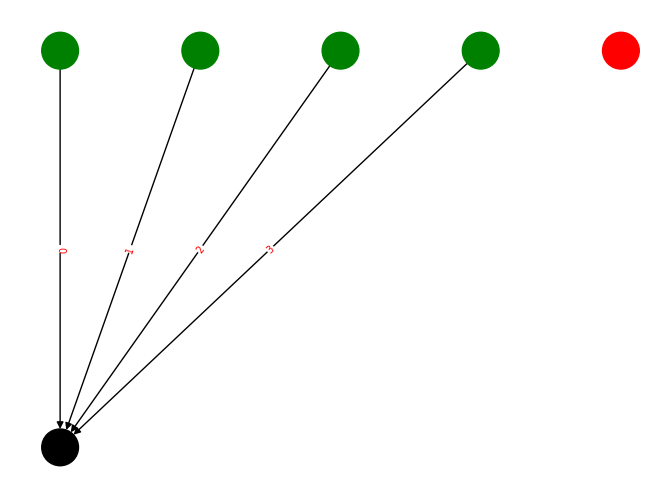

In [4]:
ind = simplest_ind(4, 1, bias=True)
ind.plot()

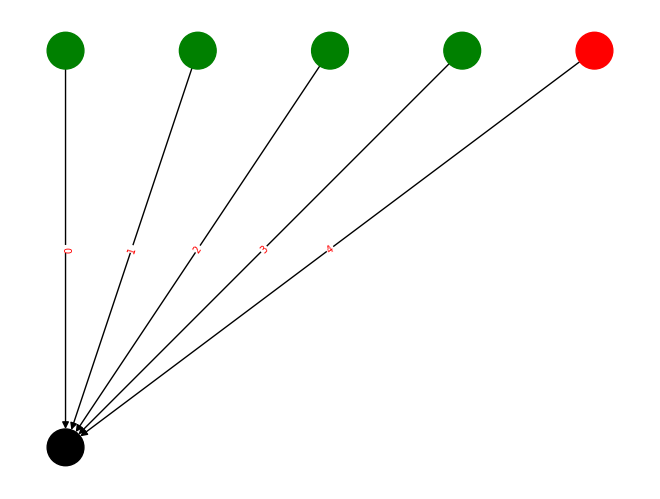

In [5]:
from IPython.display import clear_output

ind.mutate(MUTATE_SMALL)
ind.plot()

In [6]:
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.0,
    'node': 1.0
}

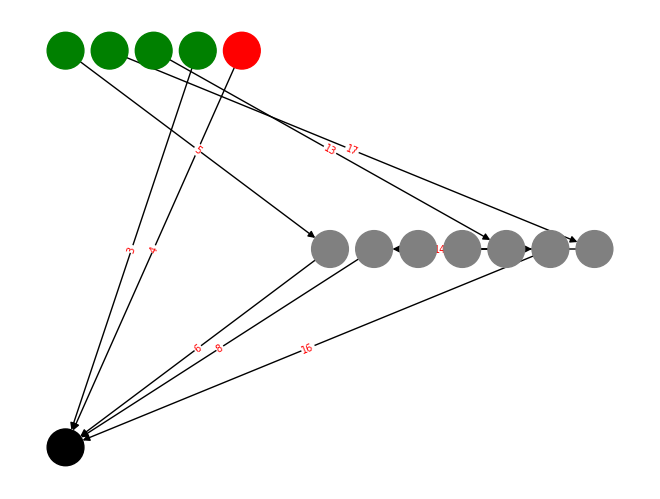

In [13]:
ind.mutate(MUTATE_SMALL)
ind.plot()

In [14]:
inp = np.array([[0,0],[0,1],[1,0],[1,1]])
out = np.array([[0],[1],[1],[0]])

def fitness(ind: Individuum):
    ind.fitness = 0
    for i,o in zip(inp,out):
        raw = ind.forward(i)
        rounded = raw.round()
        if rounded == o: 
            ind.fitness += 1
    return fitness

In [15]:
fitness(ind)

AttributeError: 'ConnectGene' object has no attribute 'in_node'

NetworkXError: Node <n2.NodeGene object at 0x7fd473c418b0> has no position.

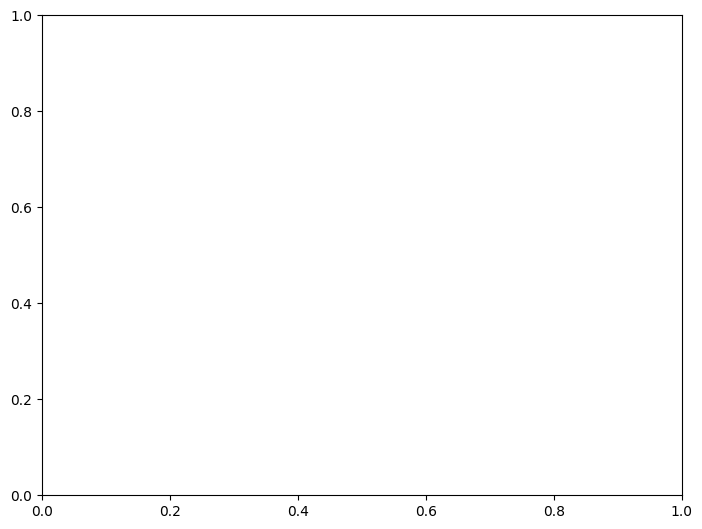

In [7]:
i1 = NodeGene(NodeTypes.Input)
i2 = NodeGene(NodeTypes.Input)
i3 = NodeGene(NodeTypes.Input)
h1 = NodeGene(NodeTypes.Hidden)
h2 = NodeGene(NodeTypes.Hidden)
h3 = NodeGene(NodeTypes.Hidden)
o1 = NodeGene(NodeTypes.Output)
nodes = [i1, i2, i3, h1, h2, h3, o1]
c1 = ConnectGene(i1, h1, 1.5)
c2 = ConnectGene(i2, h1, 1.5)
c3 = ConnectGene(i2, o1, 1.5)
c4 = ConnectGene(i3, h3, 1.5)
c5 = ConnectGene(h1, h2, 1.5)
c6 = ConnectGene(h2, o1, 1.5)
c7 = ConnectGene(h3, o1, 1.5)
connections = [c1, c2, c3, c4, c5, c6, c7]
ind = Individuum(nodes, connections)
ind.plot()

In [ ]:
for connection in ind.connect_genes:
    print(connection.in_node.marking, connection.out_node.marking, connection.weight)

inp = np.array([1, 1, 1])
print(ind.forward(inp))

0 3 1.5
1 3 1.5
1 6 1.5
2 5 1.5
3 4 1.5
4 6 1.5
5 6 1.5
[66.]
